In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Detection ##

### Canny Edge Detection ###

In [2]:
image=cv2.imread('image_22.jpg', 0)

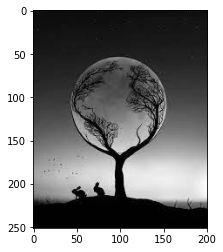

In [3]:
plt.imshow(image, cmap='gray');

In [4]:
edge=cv2.Canny(image=image, threshold1=0, threshold2=255)

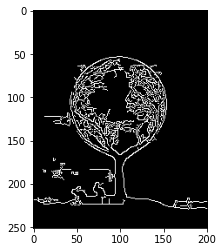

In [5]:
plt.imshow(edge, cmap='gray');

In [6]:
median_v =np.median(image)
median_v

51.0

In [7]:
low_threshold=int(max(0, (1-0.33)*median_v))
high_threshold=int(min(255, (1+0.33)*median_v))

In [8]:
low_threshold

34

In [9]:
high_threshold

67

In [10]:
edge=cv2.Canny(image=image, threshold1=46, threshold2=91)

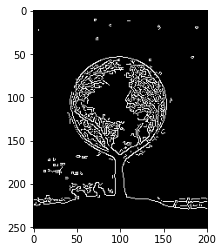

In [11]:
plt.imshow(edge, cmap='gray');

In [12]:
blured_image=cv2.blur(image, ksize=(5,5))

In [13]:
median_v =np.median(blured_image)
median_v

54.0

In [14]:
low_threshold=int(max(0, (1-0.33)*median_v))
high_threshold=int(min(255, (1+0.33)*median_v))

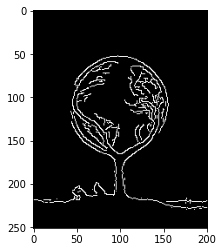

In [15]:
edge_blured=cv2.Canny(image=blured_image, threshold1=46, threshold2=91)
plt.imshow(edge_blured, cmap='gray');

### Harris Corner Detection ###

In [16]:
image_corner=cv2.imread('1291290878-612x612.jpg', 0)

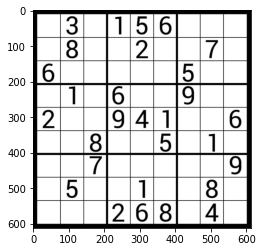

In [17]:
plt.imshow(image_corner, cmap='gray');

In [18]:
dst=cv2.cornerHarris(image_corner, blockSize=2, ksize=3,  k=0.04)

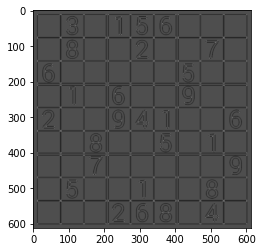

In [19]:
plt.imshow(dst, cmap='gray');

In [20]:
dst=cv2.dilate(dst, None)

In [21]:
dst=cv2.dilate(dst, None)
image_corner[dst>0.2*dst.max()]=1

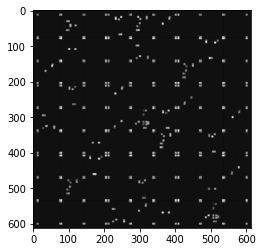

In [22]:
plt.imshow(dst, cmap='gray')

### shi tomsai detection ###

In [23]:
img_shi=cv2.imread('1291290878-612x612.jpg', 0)

In [24]:
img_shi=np.float32(img_shi)

In [25]:
corners=cv2.goodFeaturesToTrack(img_shi, 150, 0.01, 10)
corners=np.int64(corners)

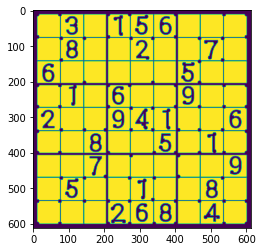

In [26]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(img_shi, (x,y), 5, (0,0,125), cv2.FILLED)
plt.imshow(img_shi)

### Color Based Object Detection ###

In [2]:
from collections import deque

In [3]:
buffer_size=12

In [4]:
points=deque(maxlen=buffer_size)

In [5]:
lower=(118,100,85)
upper=(255,255,255)

In [6]:
cap=cv2.VideoCapture(0)
cap.set(3,880)
cap.set(4,480)

True

In [14]:
while True:
    success, img_cod=cap.read()
    if success:
        blurred=cv2.GaussianBlur(img_cod, (7,7), 0)
        hsv=cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        cv2.imshow('hsv cap', hsv)
        mask=cv2.inRange(hsv, lower, upper)
        mask=cv2.erode(mask, None, iterations=2)
        mask=cv2.dilate(mask, None, iterations=2)
        cv2.imshow('mask+blurred', mask)
        #contour
        contours=cv2.findContours(mask.cpoy(), cv2.RETR.EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        center=None
        if len(contours)>0:
            v=max(contours, key=cv2.contourArea)
            rect=cv2.minAreaRect(v)
            (x,y), (widht, (height), rotation)=rect
        #box
        box=cv2.boxPoints(rect)
        box=int64(box)
        #moment
        m=moments(v)
        center=(int(m['m10']/[m['m00'])), (int(m['m10']/[m['m00']))
        #draw
        cv2.drawContours(img_cod, [box], 0, (0,0,255), 2)
        #deque
        points.appendleft(center)
        for i in range(1, len(points)):
            if points[i-1] is None or points[i] is None: continue
            cv2.line(img_cod, points[i-1], points[i], (255,0,0), 2)
        cv2.circle(img_cod, center, 5, (255,0,0), -1)
        cv2.imshow('finally', img_cod)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):break

SyntaxError: invalid syntax (<ipython-input-14-0b1945a0cf8c>, line 23)

### Template Matching ###

In [6]:
img_all=cv2.imread('redcat.jpg',0)
img_all.shape

(374, 500)

In [7]:
img_template=cv2.imread('redcat_face.jpg',0)
img_template.shape

(128, 128)

In [8]:
height, width=img_template.shape
height, width

(128, 128)

In [9]:
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(247, 373)


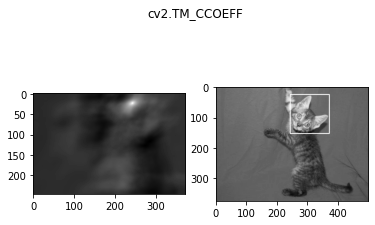

(247, 373)


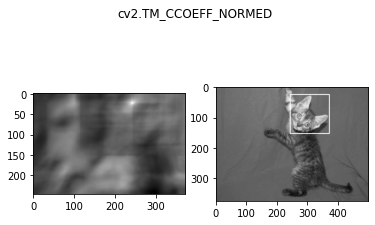

(247, 373)


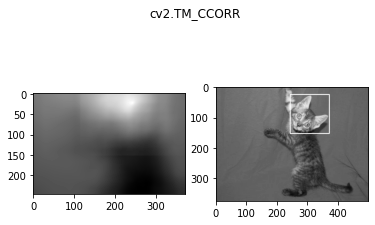

(247, 373)


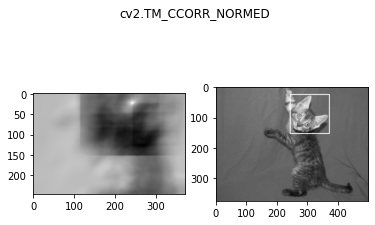

(247, 373)


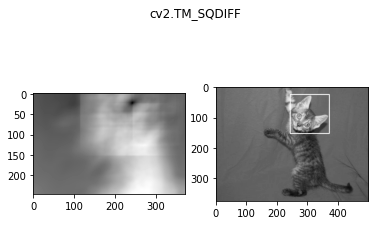

(247, 373)


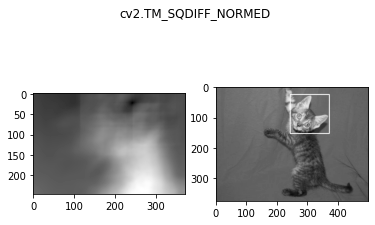

In [14]:
for i in methods:
    method=eval(i)
    res=cv2.matchTemplate(img_all, img_template, method)
    print(res.shape)
    min_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    bottom_right=(top_left[0]+width, top_left[1]+height)
    cv2.rectangle(img_all, top_left, bottom_right, 255, 2)
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.subplot(122), plt.imshow(img_all, cmap='gray')
    plt.suptitle(i)
    plt.show()

#### Feature Matching ####

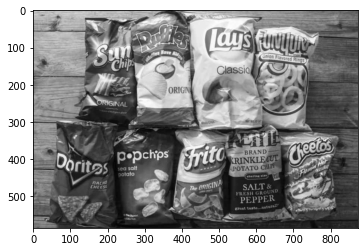

In [22]:
image_f=cv2.imread('feature_xx.jpg', 0)
plt.imshow(image_f, cmap='gray');

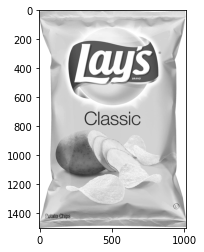

In [21]:
image_lays=cv2.imread('lays.jpg',0)
plt.imshow(image_lays, cmap='gray');

features such as edges, corners

In [23]:
orb=cv2.ORB_create()

In [38]:
kp1, des1=orb.detectAndCompute(image_lays, None)
kp2, des2=orb.detectAndCompute(image_f, None)

In [39]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING)

In [40]:
matches=bf.match(des1, des2)
matches=sorted(matches, key=lambda x: x.distance)

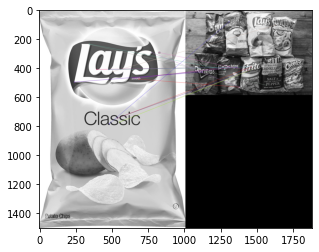

In [41]:
image_match=cv2.drawMatches(image_lays, kp1, image_f, kp2, matches[:20], None, flags=2)
plt.imshow(image_match);

The result does not look like weell.

#### with sift ####

In [36]:
pip install opencv-contrib-python --user

Note: you may need to restart the kernel to use updated packages.


In [37]:
sift=cv2.xfeatures2d.SIFT_create()

In [42]:
bf_s=cv2.BFMatcher()

In [43]:
kp1, des1=sift.detectAndCompute(image_lays, None)
kp2, des2=sift.detectAndCompute(image_f, None)

In [44]:
matches_s=bf_s.knnMatch(des1, des2, k=2)

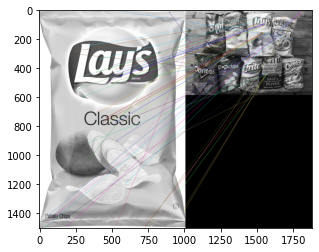

In [46]:
best_match=[]
for match1, match2 in matches_s:
    if match1.distance<0.75*match2.distance:
        best_match.append([match1])
sift_matches=cv2.drawMatchesKnn(image_lays, kp1, image_f, kp2, best_match, None, flags=2)
plt.imshow(sift_matches);

#### Watershed Algorithm ####

In [58]:
image_w=cv2.imread('coins.jpg')

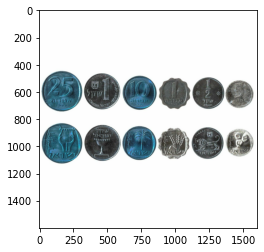

In [73]:
blur=cv2.medianBlur(image_w, 3)
plt.imshow(blur);

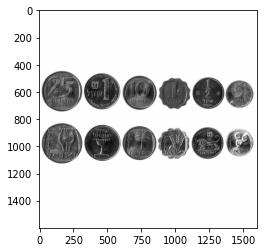

In [74]:
image_gray=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray');

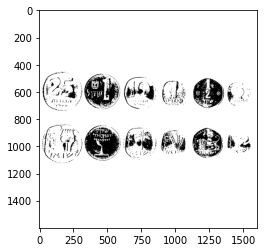

In [75]:
ret, image_threshold=cv2.threshold(image_gray, 75, 255, cv2.THRESH_BINARY)
plt.imshow(image_threshold, cmap='gray');

In [82]:
contours, hierarchy = cv2.findContours(image_threshold.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

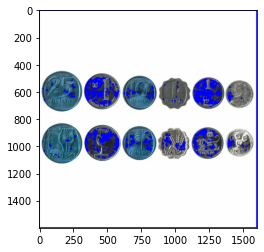

In [86]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(image_w, contours, i, (0,0,255), 10)
plt.imshow(image_w);

In [115]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image_threshold,cv2.MORPH_OPEN,kernel, iterations = 2)

In [117]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [120]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [121]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [123]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

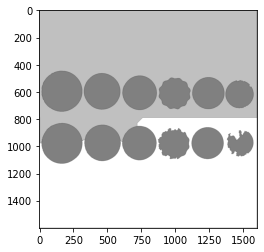

In [128]:
markers = cv2.watershed(image_w,markers)
image_w[markers == -1] = [255,0,0]
plt.imshow(markers, cmap='gray');

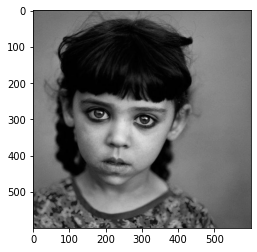

In [142]:
image_face=cv2.imread('outout.jpg', 0)
plt.imshow(image_face, cmap='gray');

In [143]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_rect=face_cascade.detectMultiScale(image_face)

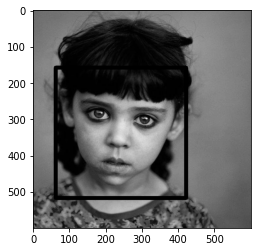

In [144]:
for x,y,w,h in face_rect:
    cv2.rectangle(image_face, (x,y),(x+w,y+h), (0,0,255), 10)
plt.imshow(image_face, cmap='gray');

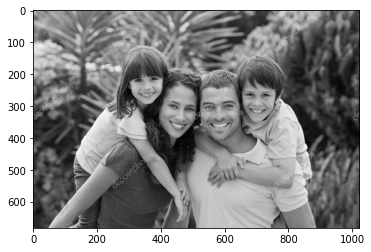

In [190]:
image_faces=cv2.imread('family.jpg', 0)
plt.imshow(image_faces, cmap='gray');

In [191]:
face_rect=face_cascade.detectMultiScale(image_faces, minNeighbors=25)

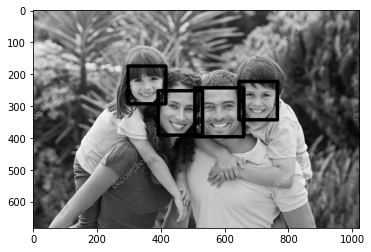

In [192]:
for x,y,w,h in face_rect:
    cv2.rectangle(image_faces, (x,y),(x+w,y+h), (0,255,255), 10)
plt.imshow(image_faces, cmap='gray');

another read methods the image

In [14]:
import os

In [15]:
files=os.listdir()
img_path_list=[]
for i in files:
    if i.endswith('.jpg'):
        img_path_list.append(i)
print(img_path_list)

['0000a68812bc7e98c42888dfb1c07da0.jpg', '1273436367-612x612.jpg', '1291290878-612x612.jpg', 'cat.1536.jpg', 'coins.jpg', 'depositphotos_64964803.jpg', 'depositphotos_6937427-l.jpg', 'family.jpg', 'feature_xx.jpg', 'images.jpg', 'images_child.jpg', 'image_2.jpg', 'image_22.jpg', 'image_7.jpg', 'istockphoto-500289721-612x612.jpg', 'lays.jpg', 'outout.jpg', 'output.jpg', 'redcat.jpg', 'redcat_face.jpg']


In [20]:
for i in img_path_list:
    print(i)
    image=cv2.imread(i)
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detector1=cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
    rects=detector1.detectMultiScale(gray, scaleFactor=1.045, minNeighbors=2)
    
    for (f, (x,y,w,h)) in enumerate(rects):
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,255), 2)
    cv2.imshow(i, image)
    if cv2.waitKey(1) & 0xFF == ord('q'): contunie

0000a68812bc7e98c42888dfb1c07da0.jpg
1273436367-612x612.jpg
1291290878-612x612.jpg
cat.1536.jpg
coins.jpg
depositphotos_64964803.jpg
depositphotos_6937427-l.jpg
family.jpg
feature_xx.jpg
images.jpg
images_child.jpg
image_2.jpg
image_22.jpg
image_7.jpg
istockphoto-500289721-612x612.jpg
lays.jpg
outout.jpg
output.jpg
redcat.jpg
redcat_face.jpg


In [21]:
path='images'

In [22]:
imgWidht=180
imgHeight=120

In [23]:
cap=cv2.VideoCapture(0)
cap.set(3,480)
cap.set(4,520)
cap.set(10,180)

True

create the image path

In [ ]:
global countFolder
def saveDataFunc():
    global countFolder
    countFoulder=0
    while os.path.exists(path + str(countFolder)):
        countFolder +=1
    os.makedirs(path + str(countFolder))
saveDataFunc()

In [24]:
count=0
countSave=0

In [ ]:
while True:
    success, img=cap.read()
    if success:
        img=cv2.resize(img, (imgWidht, imgHeight))
        if count %5==0:
            cv2.imwrite(path + str(countFolder), img)
            countSave +=1
            print(countSave)
        count +=1
        cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'): break 
cap.release()
cv2.destroyAllWindows()
            